<a href="https://colab.research.google.com/github/AdityaVarmaUddaraju/fastai_multiclass_classification/blob/master/multiclassclassification_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2019-07-28 07:09:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   109MB/s    in 1.8s    

2019-07-28 07:09:44 (109 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2019-07-28 07:09:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/t

In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [70]:
base_dir= '/tmp'
train_dir = os.path.join(path, 'rps')
train_paper_dir = os.path.join(train_dir, 'paper')

print(len(os.listdir(train_paper_dir)))

840


In [4]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   321  100   321    0     0   1543      0 --:--:-- --:--:-- --:--:--  1543
Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
tfms = get_transforms()

In [0]:
path = Path('/tmp/')

In [58]:
path.ls()

[PosixPath('/tmp/rps'),
 PosixPath('/tmp/.ipynb_checkpoints'),
 PosixPath('/tmp/rps-test-set')]

In [59]:
(path/'rps').ls()

[PosixPath('/tmp/rps/scissors'),
 PosixPath('/tmp/rps/rock'),
 PosixPath('/tmp/rps/paper')]

In [0]:
data = (ImageList.from_folder(path) #Where to find the data? -> in path and its subfolders
        .split_by_rand_pct()              #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
        .databunch())                   #Finally? -> use the defaults for conversion to ImageDataBunch

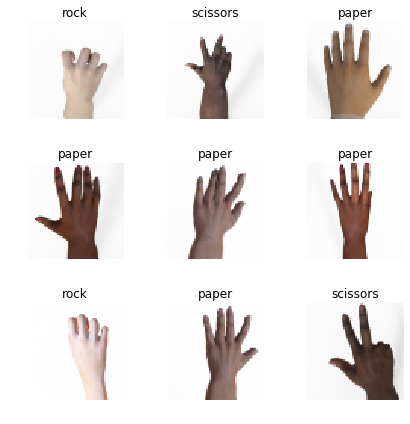

In [72]:
data.show_batch(3, figsize=(6,6))

In [73]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 80909696.43it/s]


In [74]:
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.458968,0.098617,0.960208,00:14
1,0.185978,0.021332,0.994810,00:14
2,0.109471,0.012597,0.994810,00:14
3,0.088932,0.009477,0.998270,00:14
4,0.057112,0.001271,1.000000,00:14
5,0.034638,0.000180,1.000000,00:14
6,0.025344,0.000235,1.000000,00:14
7,0.013931,0.000059,1.000000,00:14
8,0.009993,0.000064,1.000000,00:14
9,0.006327,0.000048,1.000000,00:14


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


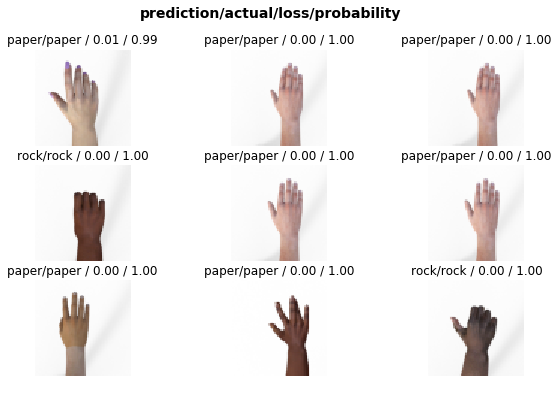

In [79]:
interp.plot_top_losses(9, figsize=(10,6))


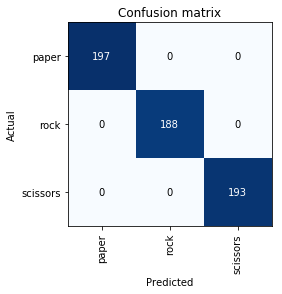

In [80]:
interp.plot_confusion_matrix()


In [81]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQHO0aLnWqtxiq4kW7fSAnGs5fNEuOGK7EZCfG_VkNWSyRsBMdN0Q

--2019-07-28 08:14:41--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQHO0aLnWqtxiq4kW7fSAnGs5fNEuOGK7EZCfG_VkNWSyRsBMdN0Q
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.124.101, 74.125.124.100, 74.125.124.102, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.124.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3659 (3.6K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcQHO0aLnWqtxiq4kW7fSAnGs5fNEuOGK7EZCfG_VkNWSyRsBMdN0Q’

images?q=tbn:ANd9Gc 100%[===================>]   3.57K  --.-KB/s    in 0s      

2019-07-28 08:14:42 (85.4 MB/s) - ‘images?q=tbn:ANd9GcQHO0aLnWqtxiq4kW7fSAnGs5fNEuOGK7EZCfG_VkNWSyRsBMdN0Q’ saved [3659/3659]



In [0]:
img = open_image('./images?q=tbn:ANd9GcQHO0aLnWqtxiq4kW7fSAnGs5fNEuOGK7EZCfG_VkNWSyRsBMdN0Q')

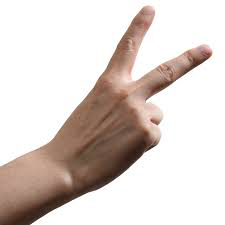

In [83]:
img

In [0]:
cat, idx, prop = learn.predict(img)

In [85]:
cat

Category scissors

In [0]:
learn.save('initial')

In [87]:
learn.load('initial')

Learner(data=ImageDataBunch;

Train: LabelList (2314 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
scissors,scissors,scissors,scissors,scissors
Path: /tmp;

Valid: LabelList (578 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
paper,rock,scissors,rock,paper
Path: /tmp;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      

In [0]:
learn.export()

In [0]:
learn.export('rps.pkl')

In [90]:
ls

 data@
'images?q=tbn:ANd9GcQHO0aLnWqtxiq4kW7fSAnGs5fNEuOGK7EZCfG_VkNWSyRsBMdN0Q'
 models@


In [91]:
learn.path

PosixPath('/tmp')